外部関数法を使って最適化するお話

In [1]:
import torch;torch.manual_seed(2019);from tqdm import tqdm as tq

In [2]:
zero=torch.Tensor([0])
f = lambda x:x[0]*x[0] + 2*x[1]*x[1] + 2*x[0]*x[1] - 3*x[0] - 4*x[1]
def P(x,rho):return f(x) + rho * (torch.max(zero,x[0]+x[1]-1)+torch.max(zero,-x[0])+torch.max(zero,-x[1]))

In [3]:
def optimize(x,rho,lr=0.01,n_epochs=1000):
    for e in range(n_epochs):
        loss=P(x,rho)
        # SGDで最適化
        loss.backward()
        with torch.no_grad():
            x=x - lr*x.grad
        x.requires_grad_()
    return x

In [4]:
rho_candi=[0.1+1.4**i for i in range(15)];x_hat_ls=[];f_ls=[]
for rho in tq(rho_candi):
    x=torch.rand(2, requires_grad=True)
    x_hat=optimize(x,rho,lr=0.001,n_epochs=10**4)
    f_=f(x_hat)
    x_hat_ls.append(x_hat.detach().numpy())
    f_ls.append(f_.detach().numpy())

100%|██████████| 15/15 [02:29<00:00,  9.84s/it]


In [5]:
import matplotlib.pyplot as plt;import seaborn as sns;sns.set()
%config InlineBackend.figure_formats = {'png', 'retina'}

x1,x2= [0.48137262 0.5186026 ] 
 f(x)= -2.249629


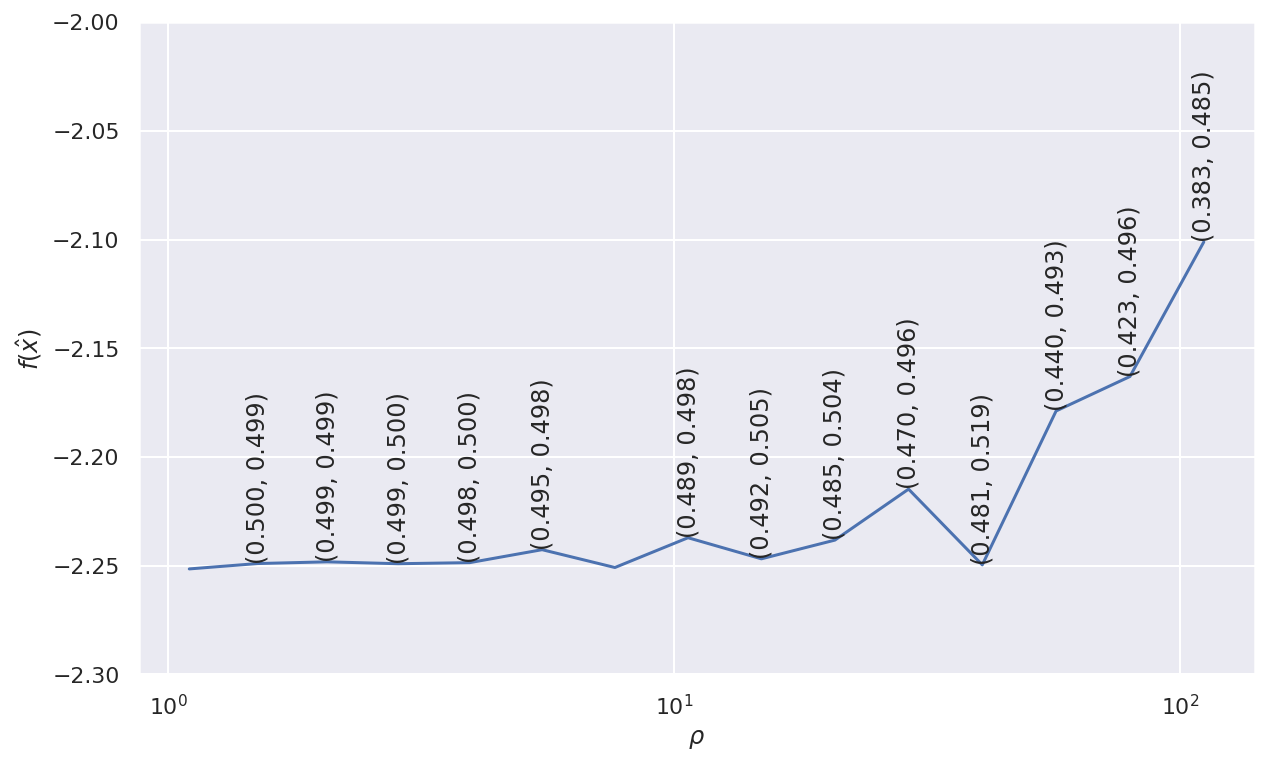

In [6]:
plt.figure(figsize=(10,6));plt.plot(rho_candi,f_ls)
plt.xscale('log');plt.xlabel(r'$\rho$');plt.ylabel(r'$f(\hat x)$');plt.ylim([-2.3,-2])
MIN=10**9
for rho, y, x_hat in zip(rho_candi, f_ls, x_hat_ls):
    if x_hat[0]+x_hat[1]-1.0 > 0 or -x_hat[0] > 0 or -x_hat[1] > 0: continue
    if y<MIN:
        MIN=y;x_argmin_condi_ok=x_hat
    plt.text(rho, y, '({:.3f}, {:.3f})'.format(x_hat[0],x_hat[1]), va='bottom', fontdict={'rotation':90})
print('x1,x2=',x_argmin_condi_ok,'\n f(x)=',MIN)

x1,x2= [0.48137262 0.5186026 ] 
 f(x)= -2.249629


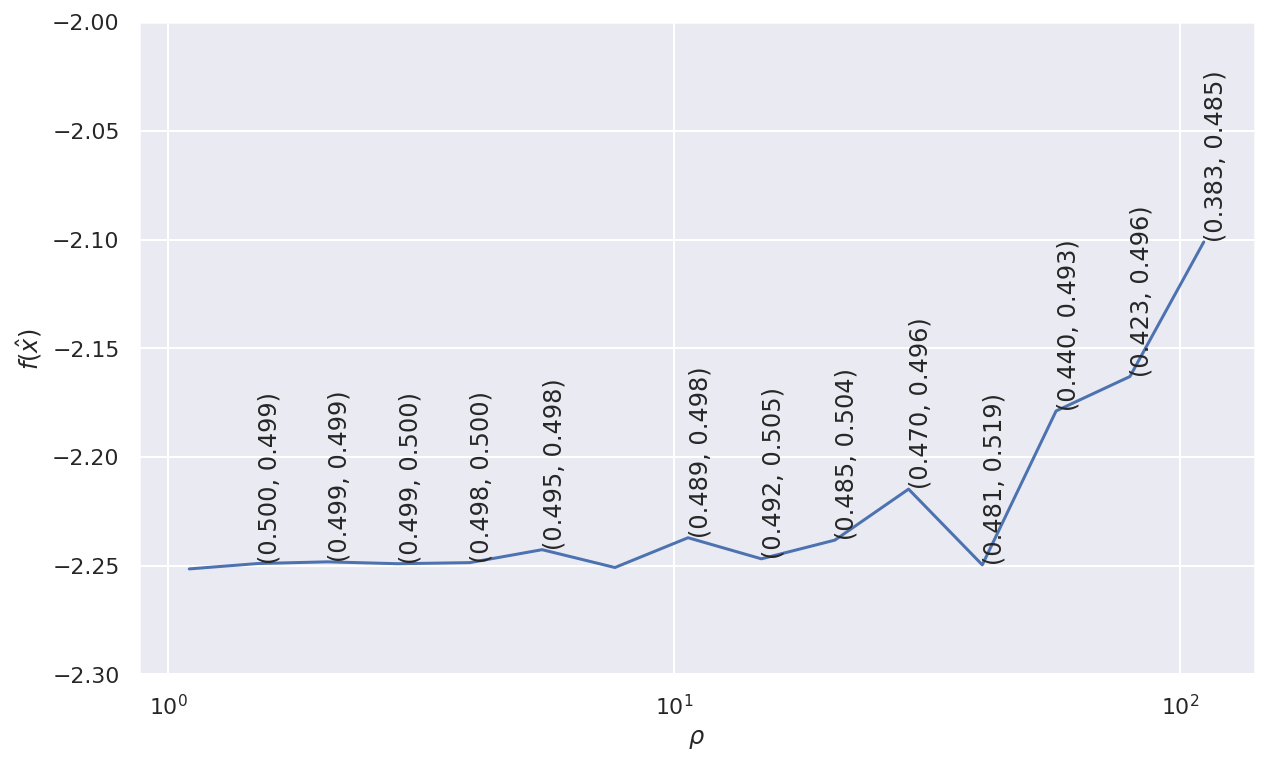

In [9]:
plt.figure(figsize=(10,6));plt.plot(rho_candi,f_ls)
plt.xscale('log');plt.xlabel(r'$\rho$');plt.ylabel(r'$f(\hat x)$');plt.ylim([-2.3,-2])
MIN=10**9
for rho, y, x_hat in zip(rho_candi, f_ls, x_hat_ls):
    if x_hat[0]+x_hat[1]-1.0 > 0 or -x_hat[0] > 0 or -x_hat[1] > 0: continue
    if y<MIN:
        MIN=y;x_argmin_condi_ok=x_hat
    plt.text(rho, y, '({:.3f}, {:.3f})'.format(x_hat[0],x_hat[1]), va='bottom', fontdict={'rotation':90,})
print('x1,x2=',x_argmin_condi_ok,'\n f(x)=',MIN)